## Department of Computer Science, University of York
### DATA: Introduction to Data Science

## Task 1: Domain Analysis  (5 marks)

Given the business domain and the data overview presented (in the assessment paper), provide a brief description of

* the business problem and its significance to the relevant sector;
* the link between the business problem and the field of data science;
* the main areas of investigation; and
* potential ideas and solutions.


**Word Limit:** 300 words

**Business Problem:** In banking, customer service and decision-making are the most critical aspects that influence a bank's performance. The bank aims to enhances these areas, which is the core of the business problem. 

The significance of this problem is immense. Improving customer service can lead to higher customer retention, more referrals, and increased lifetime value. Improving decision making can reduce risks, increase profits, and also improve the bank's market standing.

**Relation between business problem and field of data science:** The Bank has a wealth of data at its disposal. By using this data to make build Data models to gain insights into various aspects of the operation of a bank. This forms the relation between Data science and business problem Data science models can help analyze the bank dataset to gain insights into customer behaviour. Which can be used to make informed decisions for betterment of  customer retention and customer risk assessment and service.

**Main Areas of Investigation:**
* Customer Behaviour: Understanding transaction patterns, credit card usage, loan repayment behaviour.
* Risk assessment: Indentifying factors contributing to the loss of the bank (loan defaults)
* Customer Retention: Determining characteristics of high-value and loyal customers to better make the retention scheme.

**Potential Ideas and Solutions:**
* Predictive Models: Data science models that can predict customer financial behaviour, likelihood of churn.
* Segmentation: Use techniques to catergorise/cluster customers based on financial behaviour or demographics, which will allow for personalised services.
* Anomalies: Implement data model to detect unusual transactions, potentially preventing fraud.


----
----


## Task 2: Database Design (25 marks)


Having understood the business domain, present a conceptual design in the form of an entity-relationship (ER) model that would be helpful in creating a database for the bank.

The bank data currently exists in the form of a csv file called *BankRecords.csv*, provided on VLE (path given in page 5, assessment paper). This file has all the existing records. The table available in the csv file is unnormalised. The information about its different columns is given in Tables 1 and 2 (in the assessment paper).

Following the standard principles of database normalisation, normalise the given table (*BankRecords.csv*) to a database schema that has minimum redundancies. Then, using the designed schema, create an SQLite database.

Your answer should include the SQL statements needed to accomplish this step. Your submission should also include the created SQLite database file.

Your answer should clearly cover the following:
* Any assumptions you are making about the given scenario;
* The designated keys, existing relationships, and identified functional dependencies;
* The steps followed and justifications for the decisions made.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code/SQL statements or figures.

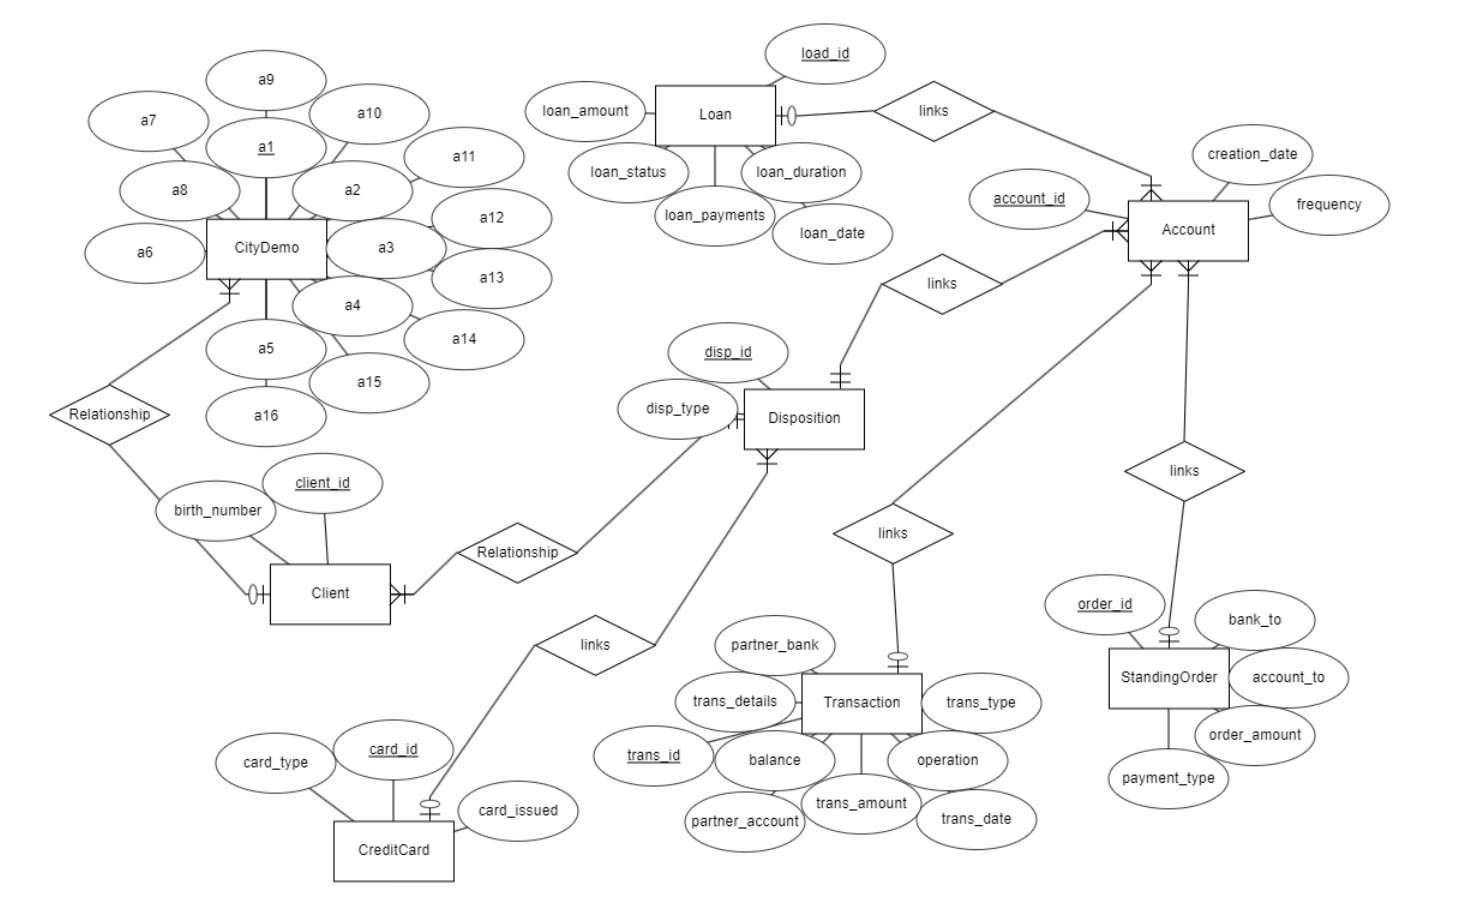
**Assumptions:**
* Each entity has its own unique identifier (Primary Key)

**Steps for Normalization:**
* First Normal Form (1NF): The given dataset was already in 1NF
* Second Normal Form (2NF): Created multiple tables to remove functional dependencies. All Non-PK attributes in a table are only dependent on the table's PK
* Third Normal Form (3NF): The database is already in 3NF.


In [ ]:
#Importing required libraries for Task 2
import pandas as pd
import sqlite3
import numpy as np

In [ ]:
#Creating Database
df = pd.read_csv('BankRecords.csv', low_memory=False)
# Connect to the database
con = sqlite3.connect('bank_database.db')
cursor = con.cursor()
#Table Client
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Client (
        client_id INTEGER PRIMARY KEY,
        birth_number INTEGER NOT NULL,
        a1 INTEGER,
        FOREIGN KEY (a1) REFERENCES City(a1)
    )
''')

#Table City
cursor.execute('''
    CREATE TABLE IF NOT EXISTS CityDemo (
        a1 INTEGER PRIMARY KEY,
        a2 TEXT, a3 TEXT, a4 INTEGER, a5 INTEGER, a6 INTEGER,
        a7 INTEGER, a8 INTEGER, a9 INTEGER, a10 REAL, a11 INTEGER,
        a12 REAL, a13 REAL, a14 INTEGER, a15 INTEGER, a16 INTEGER
    )
''')

# Table Account
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Account (
        account_id INTEGER PRIMARY KEY,
        frequency TEXT,
        creation_date INTEGER
    )
''')

# Table Loan
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Loan (
        loan_id INTEGER PRIMARY KEY,
        account_id INTEGER,
        loan_date INTEGER,
        loan_amount INTEGER,
        loan_duration INTEGER,
        loan_payments REAL,
        loan_status TEXT,
        FOREIGN KEY (account_id) REFERENCES Account(account_id)
    )
''')

# Table Standing Order
cursor.execute('''
    CREATE TABLE IF NOT EXISTS StandingOrder (
        order_id INTEGER PRIMARY KEY,
        account_id INTEGER,
        bank_to TEXT,
        account_to INTEGER,
        order_amount REAL,
        payment_type TEXT,
        FOREIGN KEY (account_id) REFERENCES Account(account_id)
    )
''')

# Table Transaction
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Transac (
        trans_id INTEGER PRIMARY KEY,
        account_id INTEGER,
        trans_date INTEGER,
        trans_type TEXT,
        operation TEXT,
        trans_amount REAL,
        balance REAL,
        trans_detail TEXT,
        partner_bank TEXT,
        partner_account INTEGER,
        FOREIGN KEY (account_id) REFERENCES Account(account_id)
    )
''')

# Table Disposition
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Disposition (
        disp_id INTEGER PRIMARY KEY,
        client_id INTEGER,
        account_id INTEGER,
        disp_type TEXT,
        FOREIGN KEY (client_id) REFERENCES Client(client_id),
        FOREIGN KEY (account_id) REFERENCES Account(account_id)
    )
''')

# Table Card
cursor.execute('''
    CREATE TABLE IF NOT EXISTS CreditCard (
        card_id INTEGER PRIMARY KEY,
        disp_id INTEGER,
        card_type TEXT,
        card_issued INTEGER,
        FOREIGN KEY (disp_id) REFERENCES Disposition(disp_id)
    )
''')
con.commit()
# Insert data into Client table
client_df = df[['client_id', 'birth_number', 'a1']].drop_duplicates(subset='client_id', keep='first').reset_index(drop=True)
client_df.to_sql('Client', con, if_exists='replace', index=False)

# Insert data into CityDemographics table
city_df = df[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16']].drop_duplicates(subset='a1', keep='first').reset_index(drop=True)
city_df.to_sql('CityDemo', con, if_exists='replace', index=False)

# Insert data into Account table
account_df = df[['account_id', 'frequency', 'creation_date']].drop_duplicates(subset='account_id', keep='first').reset_index(drop=True)
account_df.to_sql('Account', con, if_exists='replace', index=False)

# Insert data into Loan table
loan_df = df[['loan_id', 'account_id', 'loan_date', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_status']].drop_duplicates(subset='loan_id', keep='first').reset_index(drop=True)
loan_df.to_sql('Loan', con, if_exists='replace', index=False)

# Insert data into OrderTable
order_df = df[['order_id', 'account_id', 'bank_to', 'account_to', 'order_amount', 'payment_type']].drop_duplicates(subset='order_id', keep='first').reset_index(drop=True)
order_df.to_sql('StandingOrder', con, if_exists='replace', index=False)

# Insert data into Transaction table
transaction_df = df[['trans_id', 'account_id', 'trans_date', 'trans_type', 'operation', 'trans_amount', 'balance', 'trans_detail', 'partner_bank', 'partner_account']].drop_duplicates(subset='trans_id', keep='first').reset_index(drop=True)
transaction_df.to_sql('Transac', con, if_exists='replace', index=False)

# Insert data into Disposition table
disposition_df = df[['disp_id', 'client_id', 'account_id', 'disp_type']].drop_duplicates(subset='disp_id', keep='first').reset_index(drop=True)
disposition_df.to_sql('Disposition', con, if_exists='replace', index=False)

# Insert data into CreditCard table
credit_df = df[['card_id', 'disp_id', 'card_type', 'card_issued']].drop_duplicates(subset='card_id', keep='first').reset_index(drop=True)
credit_df.to_sql('CreditCard', con, if_exists='replace', index=False)

# Commit the changes
con.commit()
con.close()

----
----


## Task 3: Research Design (25 Marks)

Using the database designed in Task 2, design and implement **five** potential modelling solutions to achieve the aim of the Data Intelligence team. You need to provide clear justifications about the techniques selected in the context of the 'problem in hand'. Your design must consist of a combination of inferential statistics, supervised learning algorithms, and unsupervised learning algorithms, and include **at least one** of those techniques. Finally, your modelling solutions should be of sufficient complexity, combining information from multiple tables from the database built in Task 2, as appropriate. Your answer should clearly show the queries made to the database. If amendments are made to the database, the commands should be clearly included in your answer.

Your answer should clearly cover the following:
* Any assumptions you are making about the given scenario;
* Any data processing and data integrity steps you would undertake to make the data fit for purpose;
* Which technique(s) you would apply for each solution and why;
* An evaluation of the techniques applied in terms of the accuracy of their results (or any other suitable evaluation measure);
* Algorithmic parameters should be adequately stated and discussed;
* A discussion of ethical considerations arising from the solutions selected.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code or figures.

In [ ]:
#Importing all required libraries for Task 3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Model 1 - Supervised Learning**


**Assumptions:** 
* The 'loan_status' field is a good indicator of loan default.
* The data is accurate and up-to-date.

**Technique:**
* Logistic Regression is used. Since we're trying to predict a binary outcome, it is a good supervised learning algorithm choice.

**Algorithmic Parameters:**
* The algorithm is implemented with the 'mutinomial' option and 'lbfgs' solver based on the nature of the problem and data.

**Ethics:**
* The model uses personal data, therefore it must be ensured that data is handled confidentially.
* Impacts the financial services provided, so it is important to consider consequences.


In [ ]:
#Model 1
#Supervised Learning 


#Data Collection
con = sqlite3.connect('bank_database.db')
query1 = """
SELECT Loan.loan_amount, Loan.loan_duration, Loan.loan_payments, Loan.loan_status, 
       Account.frequency, AVG(Transac.trans_amount) as avg_trans_amount, AVG(Transac.balance) as avg_balance
FROM Loan
JOIN Account ON Loan.account_id = Account.account_id
JOIN Transac ON Account.account_id = Transac.account_id
GROUP BY Loan.loan_id
"""
df1 = pd.read_sql_query(query1, con)
con.close()


#Data Processing
df1['loan_status'] = df1['loan_status'].astype('category').cat.codes
df1['frequency'] = df1['frequency'].astype('category').cat.codes
df1.dropna(inplace=True)

X = df1.drop('loan_status', axis=1)
y = df1['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Data Modelling
model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

#Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

cm1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm1)

**Model 2 - Inferential Statistic**

**Assumptions:**
* The 'trans_amount' field accurately represents transactions amounts of the customers.
* The presence of loan is a good indicator of customer's financial behaviour 

**Technique:**
* The Mann-Whitney U Test is used because we're trying to determine if there's a significant difference in the transaction amounts between customers with loans and without.

**Algorithmic Parameters:**
* The Mann-Whitney U test is implemented without any set parameters.

**Ethics:**
* The analysis should not unfarily disadvantage against any group of customers.
* Confidentiality of the data should be maintained.




In [ ]:
#Model 2
#Inferential Statistic

#Data Collection
con = sqlite3.connect('bank_database.db')

#Query
query2 = '''
SELECT t.trans_amount, 
       CASE WHEN l.loan_id IS NOT NULL THEN 1 ELSE 0 END AS has_loan
FROM Transac t
LEFT JOIN Account a ON t.account_id = a.account_id
LEFT JOIN Loan l ON a.account_id = l.account_id
'''
df2 = pd.read_sql_query(query2, con)
con.close()

#Data Processing
df2.fillna(df2.mean(), inplace=True)
group_with_loan = df2[df2['has_loan'] == 1]['trans_amount']
group_without_loan = df2[df2['has_loan'] == 0]['trans_amount']

#Statistics
mean_with_loan = group_with_loan.mean()
mean_without_loan = group_without_loan.mean()

print("Mean transaction amount for customers with loans:", mean_with_loan)
print("Mean transaction amount for customers without loans:", mean_without_loan)

#Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(group_with_loan, group_without_loan)

#Evaluation using p-value
print("U-Statistic:", u_stat)
print("P-Value:", p_value)


**Model 3 - Supervised Learning**

**Assumptions:**
* The data is up-to-date and accurate.
* The features used are independent of each other.

**Technique:**
* Decision Tree Classifier is used. This supervised learning algorithm is used because it mirrors human decision-making more closely than other models.

**Algorithmic Parameters:**
* The Decision Tree Classifier is implemented with a random state of 42 to ensure reproducibilit of resultss.

**Ethics:**
* Decision trees, can be biased based on the data they are trained on. It must be ensured that this does not the case, the model must be trained on representative data.

In [ ]:
#Model 3
#Supervised Learning


#Data Collection
con = sqlite3.connect('bank_database.db')

#Query
query3 = """
SELECT 
    A.account_id, AVG(T.trans_amount) as avg_trans_amount, AVG(T.balance) as avg_balance,
    COUNT(T.trans_id) as trans_count, C.birth_number, 
    CASE WHEN L.loan_id IS NOT NULL THEN 1 ELSE 0 END as has_loan
FROM Account A
LEFT JOIN Transac T ON A.account_id = T.account_id
LEFT JOIN Client C ON A.account_id = C.client_id
LEFT JOIN Loan L ON A.account_id = L.account_id
GROUP BY A.account_id
"""
df3 = pd.read_sql_query(query3, con)
con.close()

#Data Processing
df3['birth_number'] = pd.to_numeric(df3['birth_number'], errors='coerce')
df3 = df3.dropna(subset=['birth_number'])
df3['year'] = df3['birth_number'].apply(lambda x: int(str(x)[:2]))
df3['month'] = df3['birth_number'].apply(lambda x: int(str(x)[2:4]))
df3['day'] = df3['birth_number'].apply(lambda x: int(str(x)[4:6]))
df3['month'] = df3['month'].apply(lambda x: x - 50 if x > 12 else x)
df3['birth_date'] = pd.to_datetime(df3[['year', 'month', 'day']], format='%y%m%d', errors='coerce')
df3['age'] = 2024 - df3['birth_date'].dt.year
df3 = df3.drop('birth_number', axis=1)
df3.fillna(0, inplace=True) # Filling missing values

A = df3.drop('has_loan', axis=1)
B = df3['has_loan']
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

scaler = StandardScaler()
A_train = scaler.fit_transform(A_train)
A_test = scaler.transform(A_test)

#Data Modelling
model3 = DecisionTreeClassifier(random_state=42)
model3.fit(A_train, B_train)

B_pred = model3.predict(A_test)

#Evaluation
accuracy = accuracy_score(B_test, B_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(B_test, B_pred))
print(confusion_matrix(B_test, B_pred))


**Model 4 - Supervised Learning**

**Assumptions:**
* The data is up-to-date and accurate.
* The 'loan_id' field in the 'Loan' table is not null if an account has a loan

**Techniquie:**
* KMeans Clustering is used. This unsupervised learning algorithm is used to partition the data into clusters. It is simple and efficient.

**Algorithmic Parameters:**
* The number of clusters is set to 2, indicating the data to be divided into 2 clusters.
* The random_state is set to 42 to ensure reproducibility of the results.

**Ethics:**
* The model only indicates correlation. Actions based on these clusters should consider other factors as well.

In [ ]:
#Model 4
#Unsupervised Learning



#Data Collection
con = sqlite3.connect('bank_database.db')

#Qeury
query = """
SELECT 
    T.account_id, AVG(T.trans_amount) as avg_trans_amount, AVG(T.balance) as avg_balance,
    COUNT(T.trans_id) as trans_count, 
    CASE WHEN L.loan_id IS NOT NULL THEN 1 ELSE 0 END as has_loan
FROM Transac T
LEFT JOIN Account A ON T.account_id = A.account_id
LEFT JOIN Loan L ON A.account_id = L.account_id
GROUP BY T.account_id
"""
df4 = pd.read_sql_query(query, con)
con.close()

#Data Processing
df4.fillna(0, inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df4)

#Data Modelling
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(df_scaled)

df4['cluster'] = kmeans.labels_
print(df4)

#Evaluation
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_scaled, df4['cluster'])
print("The average silhouette score is :", silhouette_avg)


**Model 5 - Inferential Statistic**

**Assumtions:**
* The data is accurate and up-to-date.
* The 'card_id' field in the 'CreditCard' table is not null if an account has a credit card.
* The variance of both groups are not equal.

**Technique:**
* The independent two-sample t-test, a statistical hypothesis method. It is used because we're detereming if there's a significant difference between the means of transaction amounts for account with and without credit card.

**Algorithmic Parameters:**
* The 'equal_var' is set to False, which does not assume equal population variance.

**Ethics:**
* The model categorizes customers based on whether they have a credit card or not. This information should not be used to discriminate against customers. 

In [ ]:
#Model 5
#Inferential Statistic
    

#Data Collection
conn = sqlite3.connect('bank_database.db')

#Query
query = '''
SELECT 
    T.trans_amount,
    CASE 
        WHEN CC.card_id IS NOT NULL THEN 'Has_Credit_Card' 
        ELSE 'No_Credit_Card' 
    END AS credit_card_status
FROM Transac T
LEFT JOIN Disposition D ON T.account_id = D.account_id
LEFT JOIN CreditCard CC ON D.disp_id = CC.disp_id
'''
df5 = pd.read_sql_query(query, conn)
conn.close()
group_with_card = df5[df5['credit_card_status'] == 'Has_Credit_Card']['trans_amount']
group_without_card = df5[df5['credit_card_status'] == 'No_Credit_Card']['trans_amount']
#Statistic tests
t_stat, p_value = stats.ttest_ind(group_with_card, group_without_card, equal_var=False)

#Evaluation using p-value
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


----
----

## Task 4: Experimental Results and Analysis (25 Marks)

Given the **five** modelling solutions implemented above, analyse, discuss and present your findings to the key stakeholders of the bank.

Your answer should clearly cover the following:
* Present your findings in a clear and concise manner;
* Discuss your results in the context of the selected solution;
* Discuss how these results can help the bank in performing customer risk assessment and establishing customer retention strategies;
* Present the limitations (if any) of your solutions in a clear and concise manner.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code or figures.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Model 1 - Supervised Learning**

The Logistic Regression model predicts loan status using 6 features. The features that impact the outcome i.e, the loan status  the most are customers' Average balance (1.06), Average transaction amount (0.78) and loan duration (0.69). This Losigtic model helps the bank assess customer risk by predicting the likelihood of loan default (stops making required payments). It identifies key factors influencing loan status. This insight can guide customer retention strategies, encouraging higher balances and regular transactions or help tailor communication for long term customers. 
The model however assumes there is a linear relationship between the features and the outcome.

In [ ]:
#Model 1

coef = model1.coef_[0]
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(coef)), coef)
plt.xticks(np.arange(len(coef)), X.columns, rotation=90)
plt.ylabel('Importance')  # Add label to y-axis
plt.title('Features influencing loan status')
plt.show()
print(f'Accuracy of the Model: {accuracy}')

**Model 2 - Inferential Statistics**

The model performed the Mann-Whitney U test, which shows significant difference in transaction amounts between customers with loans and those without loans. This provides insights into the transaction behaviors. Customers with loans have higher transactions amounts indicating good financial status, potentially justifying increased credit limits or additional loan offers. Customers without loans have lower transactions amounts, possibly showing the dissatisfaction, to whom the bank could tailor programs or reach out to, to prevent churn. However, the model considers limited variables and does not predict the future outcomes.

In [ ]:
#Model 2

sns.set(style="whitegrid")
color_palette = ["#3498db", "#e74c3c"]
plt.figure(figsize=(10, 6))
sns.boxplot(data=[group_with_loan, group_without_loan], palette=color_palette)
means = [mean_with_loan, mean_without_loan]
plt.scatter([0, 1], means, color='k', zorder=10)
for i, mean in enumerate(means):
    plt.text(i, mean, f'Mean: {mean:.2f}', ha='center', va='bottom', fontsize=12, color='blue')
plt.title('Transaction Amounts for Customers With and Without Loans', fontsize=16)
plt.ylabel('Transaction Amount', fontsize=14)
plt.xticks([0, 1], ['With Loan', 'Without Loan'], fontsize=12)
plt.show()


**Model 3 - Supervised Learning**

The Decision Tree model very accurately predicts if a client has a loan with 94.26% accuracy. There is a significant imbalance, with customers with loans and without. Customers predicted to have a high likelihood of taking a loan could be targeted with specific marketing ads/campaigns. It identifies customers who are likely to take out a loan, which the bank can look into other factors for the customer risk assessment. The model can also anticipate future demand, so the bank can maintain its loan portfolio. However, the model maybe biased due to the imbalance in target variable and doesn't consider other features.

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='has_loan', data=df3)
plt.title('Loan Distribution')
plt.show()
from sklearn.metrics import accuracy_score
B_pred = model3.predict(A_test)
accuracy = accuracy_score(B_test, B_pred)
print(f'Accuracy: {accuracy}')


**Model 4 - Unsupervised Learning**

The KMeans clustering model segmented the customers into two groups based on some their transaction trends. Cluster 0 represents the 'high-value' customers and Cluster 1 represents 'low-value' customers. Customers of Cluster 0 maybe considers low-risk due to their high account activity. Whereas customers in Cluster 0 maybe considers higher-risk. The bank can offer incentives to high-value customers to retain them and offer customers in Cluster 1 programs to encourage more account activiy, hence increasing their value. The model assumes that clusters are spherical and equally sized.

In [ ]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df4['avg_trans_amount'], df4['avg_balance'], c=df4['cluster'])
plt.title('Customer Segments')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Average Balance')
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 1], centroids[:, 2], marker='x', s=169, linewidths=5, color='b', zorder=10)
plt.show()


**Model 5 - Inferential Statistics**

The inferential statistical analysis compared the average transaction amounts between customers who have a credit card and who don't. The t-statistic value obtained is approx 120.67, and p-value is 0.0. The tests signal that having a credit card is associated with higher transaction amount compared to not having one. Customers with higher transaction amounts might be a higher risk, especially if transactions are leading to negative balance. This data can also help in customer retention, like customers with high transaction amounts without a credit card can be targeted credit card offers. However, the tests assume that the data follows normal distribution and the variances of both groups are equal

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_card_status', y='trans_amount', data=df5)
plt.title('Transaction Amounts by Credit Card Status')
plt.xlabel('Credit Card Status')
plt.ylabel('Transaction Amount')
plt.show()


----
----

## Task 5: Conclusion (10 Marks)

Given the insights derived from Tasks 1-4, provide a conclusion that clearly covers the following:
* A summary of the main points;
* A discussion of the significance of your results;
* Any recommendation(s) resulting from your analysis;
* Any overall ethical considerations arising from the data analysis of this business domain.

**World Limit**: 300 words.

The analysis involved creating 5 models using supervised, unsupervised and inferential statistics to gain insights into the bank's data. The models focused on predicting loan status, comparing transaction amounts, and segmenting customers. 

The models provided valuable insights. For instance, the supervised learning models achieve good accuracy in predicting load status, signalling a strong correlation between the features and the target variable. The inferential statistics model revealed significant difference in transaction amounts between customers with and without credit cards. The unsupervised learning model successfully grouped customers into clusters, providing a foundation for targeted marketing and services.

Based on the analysis, the bank could consider tailoring its servives according to the identified customer segments. Customers with higher transaction amounts can be offered premium services. The bank coudl also focus on improving services for customers predicted to have higher risk of loan default, to address the potential loss of the bank.

Data analysis can provide valuable insights, it's very important to respect privacy and confidentiality. Any personal information should be used responsibly. While predictive models can inform decision-making, they should not lead to discrimination. While customers predicted to have higher risk of loan default might require closer monitoring, they should still have the same access to services as a customer without any risk of loan default.


----
----

## Overall Academic Quality (10 Marks)
10 marks are allocated for the clarity and cohesiveness of your answers (both text and code) across all tasks with appropriate, relevant and effective analysis and presentation of the results.

## Deliverables

You should submit the following to the submission point on the teaching portal:

1. the SQLite database produced in Task 2;
2. the completed Jupyter notebook (both .ipynb and HTML files) that also includes the SQL statements (Task 2), the research design and its implementation (Task 3), and the analysis and presentation of your results (Task 4);
3. any figures or diagrams that are included in your answers in the Jupyter notebook.

For each task where text is required, we have provided guidelines above on the suggested word counts. Exceeding the word count will result in any work beyond the word count being disregarded when assessing.